<h2 style = "color : Brown"> Lead Scoring Case Study </h2>

<h3 style = "color : blue"> Business Goal </h3>
    
    
There are quite a few goals for this case study.

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [1]:
# importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import sklearn.metrics as metrics

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

<h3 style = "color : blue"> Read the Data Set </h3>

In [2]:
# loading dataframe
df_leads = pd.read_csv('Leads.csv')

# check data
print(df_leads.shape)
df_leads.head()

(9240, 37)


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

<h3 style = "color : blue"> Data Cleaning </h3>

lets check for duplicates, data imbalance, missing values etc... 

In [4]:
# check cor duplicates
df_leads.duplicated().sum()

0

No duplicates found

In [5]:
# checking for data imbalance of target variable
df_leads['Converted'].value_counts(normalize = True)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

data balance of target field looks good.

In [6]:
# checking for data imbalance of independent varaibles
vars = ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
        'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
        'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 
        'A free copy of Mastering The Interview']
for var in vars:
    print(df_leads[var].value_counts(normalize = True))

No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64
No     0.999784
Yes    0.000216
Name: Do Not Call, dtype: float64
No     0.998485
Yes    0.001515
Name: Search, dtype: float64
No    1.0
Name: Magazine, dtype: float64
No     0.999784
Yes    0.000216
Name: Newspaper Article, dtype: float64
No     0.999892
Yes    0.000108
Name: X Education Forums, dtype: float64
No     0.999892
Yes    0.000108
Name: Newspaper, dtype: float64
No     0.999567
Yes    0.000433
Name: Digital Advertisement, dtype: float64
No     0.999242
Yes    0.000758
Name: Through Recommendations, dtype: float64
No    1.0
Name: Receive More Updates About Our Courses, dtype: float64
No    1.0
Name: Update me on Supply Chain Content, dtype: float64
No    1.0
Name: Get updates on DM Content, dtype: float64
No    1.0
Name: I agree to pay the amount through cheque, dtype: float64
No     0.687446
Yes    0.312554
Name: A free copy of Mastering The Interview, dtype: float64


`Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque` are having only one value. can be deleted.

In [7]:
df_leads.drop(labels = ['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'],
              axis = 1, 
              inplace = True)

In [8]:
#get the missing value % using isnull function
df_leads_missing_values_percent = pd.DataFrame(df_leads.isnull().mean()*100)
df_leads_missing_values_percent.columns = ['PercentageMissing']
df_leads_missing_values_percent.sort_values(by = 'PercentageMissing', ascending = False).head(20)

,PercentageMissing
Lead Quality,51.590909
Asymmetrique Profile Score,45.649351
Asymmetrique Activity Score,45.649351
Asymmetrique Profile Index,45.649351
Asymmetrique Activity Index,45.649351
Tags,36.287879
Lead Profile,29.318182
What matters most to you in choosing a course,29.318182
What is your current occupation,29.112554
Country,26.634199


1. `Lead Quality, Tags` : Columns with more than 30% missing values can be droped from data frame.
2. `Lead Profile, What matters most to you in choosing a course, What is your current occupation, Country, How did you hear about X Education, Last Activity`: We can fill these nulls with mode of the columns.
3. `Asymmetrique Activity Index, Asymmetrique Profile Score, Asymmetrique Activity Score, Asymmetrique Profile Index` : lets keep the scores and delete indexes; replace score nulls as 0
3. `Specialization, City` : fill null with 'Select'
4.  `Page Views Per Visit`: fill null wth mean value
5. `TotalVisits`: full null with 0

In [9]:
print(df_leads['Lead Profile'].value_counts())
print ('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print ('++++++++ What matters most to you in choosing a course ++++++++++++++++++++++++')
print ('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print(df_leads['What matters most to you in choosing a course'].value_counts())
print ('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print ('+++++++++++++ What is your current occupation ++++++++++++++++++++++++++++++++++')
print ('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print(df_leads['What is your current occupation'].value_counts())
print ('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print ('+++++++++++++++++++++ Country ++++++++++++++++++++++++++++++++++++++++++++++++')
print ('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print(df_leads['Country'].value_counts())
print ('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print ('+++++++++++++++++++ How did you hear about X Education ++++++++++++++++++++++++')
print ('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print(df_leads['How did you hear about X Education'].value_counts())
print ('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print ('+++++++++++++++++++++++++++++ Specialization ++++++++++++++++++++++++++++++++++')
print ('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print(df_leads['Specialization'].value_counts())
print ('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print ('+++++++++++++++++++++++++++++ City ++++++++++++++++++++++++++++++++++++++++++++')
print ('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print(df_leads['City'].value_counts())
print ('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print ('+++++++++++++++++++++++++++++ Page Views Per Visit +++++++++++++++++++++++++++++')
print ('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print(df_leads['Page Views Per Visit'].value_counts())
print ('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print ('+++++++++++++++++++++++++++++ TotalVisits ++++++++++++++++++++++++++++++++++++++')
print ('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print(df_leads['TotalVisits'].value_counts())
print ('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print ('+++++++++++++++++++++++++++++ Last Activity ++++++++++++++++++++++++++++++++++++')
print ('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print(df_leads['Last Activity'].value_counts())
print ('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print ('++++++++++++++++++++++++++++++ Lead Source +++++++++++++++++++++++++++++++++++++')
print ('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print(df_leads['Lead Source'].value_counts())

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++ What matters most to you in choosing a course ++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++ What is your current occupation ++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Unemployed              5600
Working Professional     706
Student                  210
Other      

In [10]:
# drop columns 
df_leads.drop(labels = ['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Tags'], 
              axis = 1, 
              inplace = True)

# replace null values with mode of the columns
df_leads['Lead Profile'].fillna(df_leads['Lead Profile'].mode()[0], 
                                inplace = True)
df_leads['What matters most to you in choosing a course'].fillna(df_leads['What matters most to you in choosing a course'].mode()[0],
                                                                 inplace = True)
df_leads['What is your current occupation'].fillna(df_leads['What is your current occupation'].mode()[0], 
                                                   inplace = True)
df_leads['Country'].fillna(df_leads['Country'].mode()[0],
                           inplace = True)
df_leads['How did you hear about X Education'].fillna(df_leads['How did you hear about X Education'].mode()[0],
                                                      inplace = True)
df_leads['Last Activity'].fillna(df_leads['Last Activity'].mode()[0], 
                                  inplace = True)
df_leads['Lead Source'].fillna(df_leads['Lead Source'].mode()[0], 
                                  inplace = True)

# replace null values with mean value
df_leads['Page Views Per Visit'].fillna(df_leads['Page Views Per Visit'].mean(), 
                                  inplace = True)

# replace null values with specific values
df_leads['Specialization'].fillna('Select',
                                  inplace = True)
df_leads['City'].fillna('Select',
                        inplace = True)
df_leads['TotalVisits'].fillna(0,
                        inplace = True)
df_leads['Asymmetrique Profile Score'].fillna(0,
                        inplace = True)
df_leads['Asymmetrique Activity Score'].fillna(0,
                        inplace = True)

In [11]:
#get the missing value % using isnull function again
df_leads_missing_values_percent = pd.DataFrame(df_leads.isnull().mean()*100)
df_leads_missing_values_percent.columns = ['PercentageMissing']
df_leads_missing_values_percent.sort_values(by = 'PercentageMissing', ascending = False).head(20)

,PercentageMissing
Prospect ID,0.0
Specialization,0.0
A free copy of Mastering The Interview,0.0
Asymmetrique Profile Score,0.0
Asymmetrique Activity Score,0.0
City,0.0
Lead Profile,0.0
What matters most to you in choosing a course,0.0
What is your current occupation,0.0
How did you hear about X Education,0.0


<h4 style = "color : blue"> Check for Outliers </h4>

Check for outliers in numerical variables.

In [12]:
numvars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
df_leads[numvars].describe(percentiles = [.25,.5,.75,.90,.95,.99,.999])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,3.394156,487.698268,2.362820,7.775541,8.883550
std,4.836682,548.021466,2.145333,7.199329,8.250664
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,1.000000,0.000000,0.000000
50%,3.000000,248.000000,2.000000,13.000000,14.000000
75%,5.000000,936.000000,3.000000,14.000000,16.000000
90%,7.000000,1380.000000,5.000000,15.000000,18.000000
95%,10.000000,1562.000000,6.000000,16.000000,19.000000
99%,17.000000,1840.610000,9.000000,17.000000,20.000000


looks like we do have some outliers in`TotalVisits` and `Page Views Per Visit`

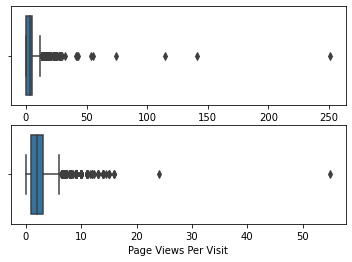

In [13]:
# lets visualize the outliers
plt.subplot(2,1,1)
sns.boxplot(df_leads['TotalVisits'])
plt.subplot(2,1,2)
sns.boxplot(df_leads['Page Views Per Visit'])
plt.show()

In [14]:
cap = np.quantile(df_leads['TotalVisits'],.99)
df_leads['TotalVisits'] = df_leads['TotalVisits'].apply(lambda x: x if x<=cap else cap)
cap = np.quantile(df_leads['Page Views Per Visit'],.99)
df_leads['Page Views Per Visit'] = df_leads['Page Views Per Visit'].apply(lambda x: x if x<=cap else cap)


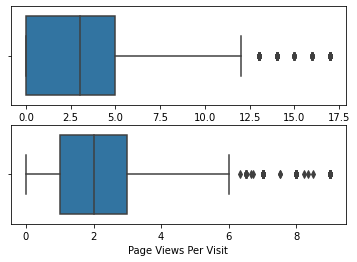

In [15]:
plt.subplot(2,1,1)
sns.boxplot(df_leads['TotalVisits'])
plt.subplot(2,1,2)
sns.boxplot(df_leads['Page Views Per Visit'])
plt.show()

now values looks ok... 

<h4 style = "color : blue"> Binary category mapping </h4>

Conver Yes/No varaibles to 1/0

In [16]:
varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0, 'Yes': 1, "No": 0, 'YES': 1, "NO": 0})

# Applying the function to the housing list
df_leads[varlist] = df_leads[varlist].apply(binary_map)

In [17]:
# Lets craete Indian fields with fills 1 for indian 0 for rest
df_leads['Indian'] = df_leads['Country'].apply(lambda x: 1 if x == 'India' else 0)

<h4 style = "color : blue"> Dummy variable creation </h4>

Create dummy variables and convert non binary categorical values to numerical variables.

In [18]:
lead_origin = pd.get_dummies(df_leads['Lead Origin'], drop_first = True, prefix = 'LO')
lead_profile = pd.get_dummies(df_leads['Lead Profile'], drop_first = True, prefix = 'LP')
city = pd.get_dummies(df_leads['City'], drop_first = True, prefix = 'City')
HDH = pd.get_dummies(df_leads['How did you hear about X Education'], drop_first = True, prefix = 'HDH')
Occupation = pd.get_dummies(df_leads['What is your current occupation'], drop_first = True, prefix = 'Occ')

# Add the results to the original housing dataframe
df_leads = pd.concat([df_leads, lead_origin], axis = 1)
df_leads = pd.concat([df_leads, lead_profile], axis = 1)
df_leads = pd.concat([df_leads, city], axis = 1)
df_leads = pd.concat([df_leads, HDH], axis = 1)
df_leads = pd.concat([df_leads, Occupation], axis = 1)

# Now let's see the head of our dataframe.
df_leads.drop (['Lead Origin', 'Lead Profile', 'City', 'How did you hear about X Education','What is your current occupation'], 
               axis = 1 ,
               inplace = True)
df_leads.head()

,Prospect ID,Lead Number,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,HDH_SMS,HDH_Select,HDH_Social Media,HDH_Student of SomeSchool,HDH_Word Of Mouth,Occ_Housewife,Occ_Other,Occ_Student,Occ_Unemployed,Occ_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,India,...,0,1,0,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,Organic Search,0,0,5.0,674,2.5,Email Opened,India,...,0,1,0,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,...,0,1,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Direct Traffic,0,0,1.0,305,1.0,Unreachable,India,...,0,0,0,0,1,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Google,0,1,2.0,1428,1.0,Converted to Lead,India,...,0,0,0,0,0,0,0,0,1,0


<h3 style = "color : blue"> Train Test Split </h3>

Lets split data source to X and y

In [19]:
X = df_leads.select_dtypes(np.number).drop(['Lead Number', 'Converted'], axis = 1)
y = df_leads['Converted']

In [20]:
#test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

<h4 style = "color : blue"> Feature Scaling </h4>

Let's try to scale the numerical variables

In [21]:
scaler  = StandardScaler()
X_train[numvars] = scaler.fit_transform(X_train[numvars])
X_train[numvars].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,6.468000e+03,6.468000e+03,6.468000e+03,6.468000e+03,6.468000e+03
mean,7.525074e-17,-1.609377e-16,3.011746e-16,8.980654e-17,6.399059e-17
std,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00
min,-1.000699e+00,-8.853708e-01,-1.183540e+00,-1.072662e+00,-1.069345e+00
25%,-1.000699e+00,-8.634138e-01,-6.743435e-01,-1.072662e+00,-1.069345e+00
50%,-8.684527e-02,-4.352528e-01,-1.651471e-01,7.309959e-01,6.249915e-01
75%,5.223903e-01,8.098906e-01,3.440493e-01,8.697388e-01,8.670396e-01
max,4.177804e+00,3.271816e+00,3.399228e+00,1.424711e+00,1.351136e+00


<h5 style = "color : blue"> Check Correlation </h5>

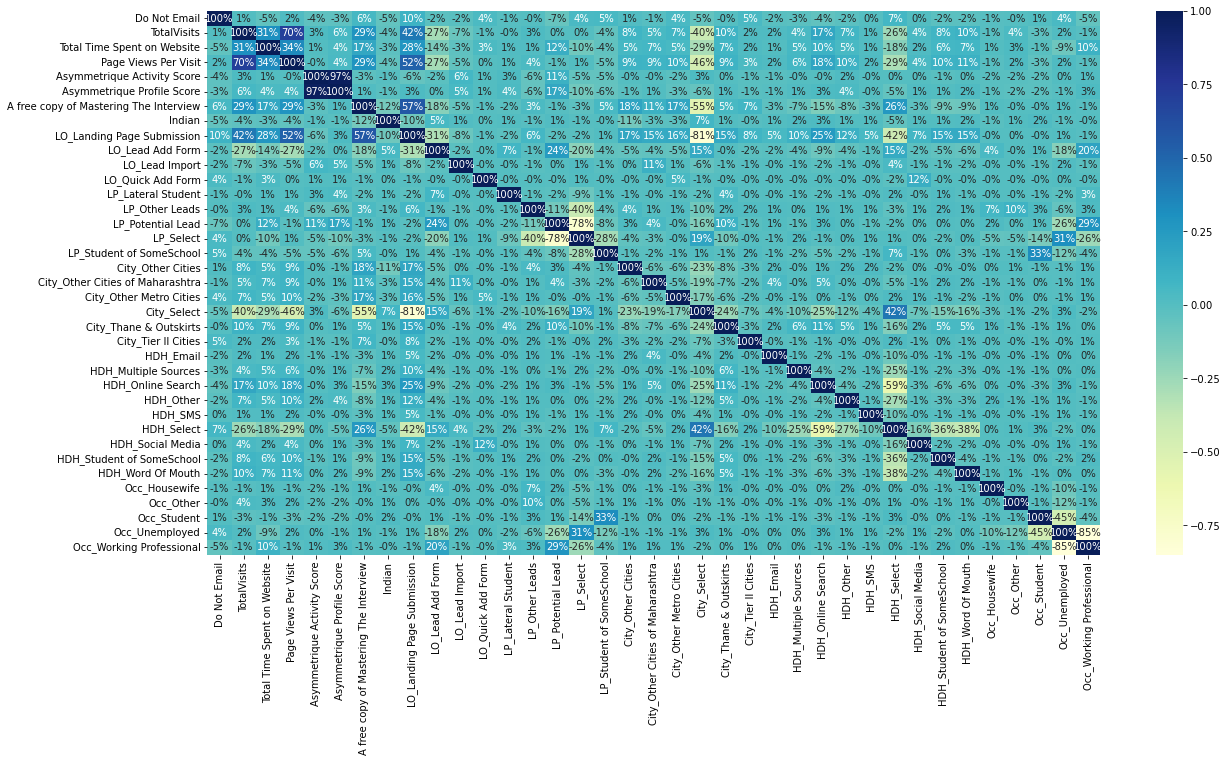

In [22]:
plt.figure (figsize = (20,10))
sns.heatmap (X.corr(), annot = True, cmap = 'YlGnBu', fmt = '.0%')
plt.show()

 `Asymmetrique Activity Score, LP_Select, City_Select, HDH_Select, LO_Landing Page Submission, TotalVisits, Occ_Unemployed` has highly correlate to other variables.
 we can drop these from dataset


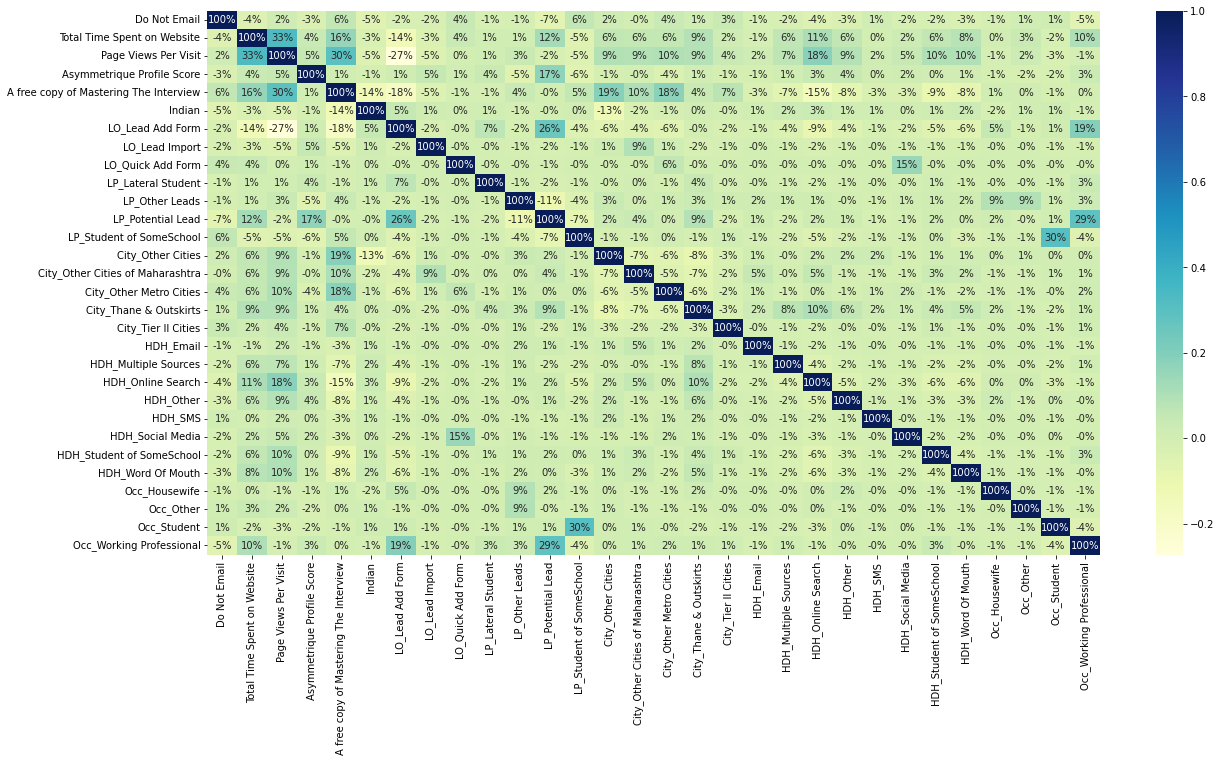

In [23]:
X.drop(labels = ['LP_Select', 'City_Select', 'HDH_Select', 'LO_Landing Page Submission', 'TotalVisits', 'Asymmetrique Activity Score', 'Occ_Unemployed'], 
       axis = 1, 
       inplace = True)

numvars = ['Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Profile Score']
#test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)
X_train[numvars] = scaler.fit_transform(X_train[numvars])

#lets see correlation again
plt.figure (figsize = (20,10))
sns.heatmap (X_train.corr(), annot = True, cmap = 'YlGnBu', fmt = '.0%')
plt.show()

<h3 style = "color : blue"> Model Building </h3>

Lets start building first model.

In [24]:
X_train_sm = sm.add_constant(X_train)

logml = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6437
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2829.4
Date:                Mon, 17 Oct 2022   Deviance:                       5658.7
Time:                        22:41:34   Pearson chi2:                 9.58e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3652
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.4141      0.211     -6.690      0.000      -1.828      -1.000
Do Not Email                              -1.2891      0.159     -8.116      0.000      -1.600      -0.978
Total Time Spent on Website                1.0005      0.036     27.653      0.000       0.930       1.071
Page Views Per Visit                      -0.1341      0.040     -3.345      0.001      -0.213      -0.056
Asymmetrique Profile Score                -0.1821      0.035     -5.253      0.000      -0.250      -0.114
A free copy of Mastering The Interview    -0.2763      0.086     -3.209      0.001      -0.445      -0.108
Indian                                     0.3592      0.207      1.736      0.083      -0.046       0.765
LO_Lead Add Form                           3.3498      0.184     18.250      0.000       2.990       3.710
LO_Lead Import                            -0.5523      0.550     -1.004      0.316      -1.631       0.526
LO_Quick Add Form                         21.3569   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
LP_Lateral Student                         2.6208      1.088      2.409      0.016       0.488       4.753
LP_Other Leads                            -0.0658      0.153     -0.430      0.667      -0.366       0.234
LP_Potential Lead                          1.7397      0.097     17.881      0.000       1.549       1.930
LP_Student of SomeSchool                  -2.3681      0.435     -5.441      0.000      -3.221      -1.515
City_Other Cities                          0.0867      0.130      0.667      0.505      -0.168       0.341
City_Other Cities of Maharashtra           0.0170      0.156      0.109      0.913      -0.289       0.323
City_Other Metro Cities                    0.2643      0.166      1.594      0.111      -0.061       0.589
City_Thane & Outskirts                    -0.1322      0.128     -1.035      0.301      -0.383       0.118
City_Tier II Cities                       -0.2368      0.381     -0.622      0.534      -0.983       0.509
HDH_Email                                  0.5747      0.587      0.979      0.327      -0.576       1.725
HDH_Multiple Sources                      -0.2825      0.256     -1.102      0.270      -0.785       0.220
HDH_Online Search                          0.0504      0.118      0.426      0.670      -0.182       0.282
HDH_Other                                  0.0755      0.226      0.334      0.738      -0.368       0.519
HDH_SMS                                   -0.8646      0.758     -1.140      0.254      -2.351       0.622
HDH_Social Media                           0.2104      0.364      0.579      0.563      -0.502       0.923
HDH_Student of SomeSchool                  0.0536      0.183      0.293      0.770     

we see some p values nearing 1; lets try using RFE to eliminate variables.


<h3 style = "color : blue"> Recursive Feature Elemination </h3>

In [25]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
print(list(zip(X_train.columns, rfe.support_, rfe.ranking_)))
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print(col)

[('Do Not Email', True, 1), ('Total Time Spent on Website', True, 1), ('Page Views Per Visit', False, 8), ('Asymmetrique Profile Score', False, 6), ('A free copy of Mastering The Interview', True, 1), ('Indian', True, 1), ('LO_Lead Add Form', True, 1), ('LO_Lead Import', True, 1), ('LO_Quick Add Form', False, 5), ('LP_Lateral Student', True, 1), ('LP_Other Leads', False, 13), ('LP_Potential Lead', True, 1), ('LP_Student of SomeSchool', True, 1), ('City_Other Cities', False, 11), ('City_Other Cities of Maharashtra', False, 16), ('City_Other Metro Cities', False, 2), ('City_Thane & Outskirts', False, 9), ('City_Tier II Cities', False, 4), ('HDH_Email', True, 1), ('HDH_Multiple Sources', True, 1), ('HDH_Online Search', False, 15), ('HDH_Other', False, 12), ('HDH_SMS', True, 1), ('HDH_Social Media', False, 7), ('HDH_Student of SomeSchool', False, 14), ('HDH_Word Of Mouth', False, 10), ('Occ_Housewife', True, 1), ('Occ_Other', False, 3), ('Occ_Student', True, 1), ('Occ_Working Professional'

In [26]:
df_ranking = pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)))
df_ranking.columns = ['Feature', 'Support_T/F', 'Rank' ]
df_ranking.sort_values(by = 'Rank')


,Feature,Support_T/F,Rank
0,Do Not Email,True,1
26,Occ_Housewife,True,1
22,HDH_SMS,True,1
19,HDH_Multiple Sources,True,1
18,HDH_Email,True,1
28,Occ_Student,True,1
12,LP_Student of SomeSchool,True,1
11,LP_Potential Lead,True,1
9,LP_Lateral Student,True,1
29,Occ_Working Professional,True,1


<h4 style = "color : blue"> Creating and Accesing model using RFE columns </h4>

In [27]:
X_train_sm = sm.add_constant(X_train[col])

logml2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logml2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2853.2
Date:                Mon, 17 Oct 2022   Deviance:                       5706.4
Time:                        22:41:37   Pearson chi2:                 1.03e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3605
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.3505      0.207     -6.533      0.000      -1.756      -0.945
Do Not Email                              -1.2615      0.157     -8.025      0.000      -1.570      -0.953
Total Time Spent on Website                0.9652      0.034     28.275      0.000       0.898       1.032
A free copy of Mastering The Interview    -0.3239      0.074     -4.386      0.000      -0.469      -0.179
Indian                                     0.3412      0.205      1.668      0.095      -0.060       0.742
LO_Lead Add Form                           3.4195      0.180     19.013      0.000       3.067       3.772
LO_Lead Import                            -0.5804      0.538     -1.079      0.281      -1.635       0.474
LP_Lateral Student                         2.4227      1.088      2.227      0.026       0.291       4.555
LP_Potential Lead                          1.6218      0.092     17.550      0.000       1.441       1.803
LP_Student of SomeSchool                  -2.2359      0.436     -5.131      0.000      -3.090      -1.382
HDH_Email                                  0.5473      0.569      0.962      0.336      -0.568       1.663
HDH_Multiple Sources                      -0.3822      0.250     -1.528      0.126      -0.872       0.108
HDH_SMS                                   -0.9192      0.740     -1.243      0.214      -2.369       0.531
Occ_Housewife                             22.5771   1.31e+04      0.002      0.999   -2.57e+04    2.57e+04
Occ_Student                                0.6209      0.255      2.433      0.015       0.121       1.121
Occ_Working Professional                   2.5777      0.186     13.844      0.000       2.213       2.943
==========================================================================================================
"""

In [28]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)

# create data from with y_actual and y_pred 

y_train_pred_final=pd.DataFrame()
y_train_pred_final['ID']= y_train.index
y_train_pred_final['Converted']= y_train.values
y_train_pred_final['Converted_prob']= y_train_pred
y_train_pred_final['Predicted']= y_train_pred_final['Converted_prob'].map(lambda x: 0 if x<0.5 else 1)

y_train_pred_final

,ID,Converted,Converted_prob,Predicted
0,1871,0,0.134260,0
1,6795,0,0.209543,0
2,3516,0,0.157545,0
3,8105,0,0.576491,1
4,3934,0,0.134260,0
...,...,...,...,...
6463,350,1,0.981629,1
6464,79,1,0.999089,1
6465,8039,1,0.134260,0
6466,6936,0,0.138749,0


<h5 style = "color : blue"> Confusion metrix </h5>

In [29]:
# Create confusion matrix
confusion = metrics.confusion_matrix(y_true = y_train_pred_final['Converted'], y_pred = y_train_pred_final['Predicted'])
print(confusion)
print('+++++++++++++++++++++++++++++++++')

# Calculate accuracy
print(metrics.accuracy_score(y_true = y_train_pred_final['Converted'], y_pred = y_train_pred_final['Predicted']))

[[3535  467]
 [ 844 1622]]
+++++++++++++++++++++++++++++++++
0.7973098330241187


We Actually got very good model with 79.7 % accuracy score.
lets try eleiminate multi correlated variables and try creating final model.

<h4 style = "color : blue"> Manula feature elimination </h4>

In [30]:
vif = pd.DataFrame()
vif['Feature'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF', ascending = False)

,Feature,VIF
3,Indian,1.87
2,A free copy of Mastering The Interview,1.49
7,LP_Potential Lead,1.42
4,LO_Lead Add Form,1.28
14,Occ_Working Professional,1.22
8,LP_Student of SomeSchool,1.15
13,Occ_Student,1.13
0,Do Not Email,1.09
1,Total Time Spent on Website,1.09
10,HDH_Multiple Sources,1.03


VIF values are well in ranve... lets try to remove high p value variable.

In [31]:
col = col.drop('Occ_Housewife', 1)

X_train_sm = sm.add_constant(X_train[col])

logml3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logml3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2858.7
Date:                Mon, 17 Oct 2022   Deviance:                       5717.4
Time:                        22:41:37   Pearson chi2:                 1.03e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3594
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.3505      0.206     -6.542      0.000      -1.755      -0.946
Do Not Email                              -1.2662      0.157     -8.054      0.000      -1.574      -0.958
Total Time Spent on Website                0.9650      0.034     28.291      0.000       0.898       1.032
A free copy of Mastering The Interview    -0.3184      0.074     -4.319      0.000      -0.463      -0.174
Indian                                     0.3433      0.204      1.681      0.093      -0.057       0.743
LO_Lead Add Form                           3.4308      0.180     19.099      0.000       3.079       3.783
LO_Lead Import                            -0.5822      0.538     -1.082      0.279      -1.636       0.472
LP_Lateral Student                         2.4182      1.088      2.223      0.026       0.286       4.551
LP_Potential Lead                          1.6206      0.092     17.549      0.000       1.440       1.802
LP_Student of SomeSchool                  -2.2390      0.436     -5.138      0.000      -3.093      -1.385
HDH_Email                                  0.5455      0.569      0.959      0.338      -0.570       1.661
HDH_Multiple Sources                      -0.3842      0.250     -1.536      0.125      -0.874       0.106
HDH_SMS                                   -0.9206      0.740     -1.245      0.213      -2.370       0.529
Occ_Student                                0.6179      0.255      2.421      0.015       0.118       1.118
Occ_Working Professional                   2.5739      0.186     13.823      0.000       2.209       2.939
==========================================================================================================
"""

In [32]:
col = col.drop('HDH_Email', 1)

X_train_sm = sm.add_constant(X_train[col])

logml4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logml4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2859.2
Date:                Mon, 17 Oct 2022   Deviance:                       5718.3
Time:                        22:41:37   Pearson chi2:                 1.03e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3593
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.3488      0.206     -6.534      0.000      -1.753      -0.944
Do Not Email                              -1.2677      0.157     -8.064      0.000      -1.576      -0.960
Total Time Spent on Website                0.9648      0.034     28.287      0.000       0.898       1.032
A free copy of Mastering The Interview    -0.3212      0.074     -4.360      0.000      -0.466      -0.177
Indian                                     0.3443      0.204      1.686      0.092      -0.056       0.745
LO_Lead Add Form                           3.4278      0.180     19.084      0.000       3.076       3.780
LO_Lead Import                            -0.5852      0.538     -1.088      0.277      -1.639       0.469
LP_Lateral Student                         2.4166      1.088      2.221      0.026       0.284       4.549
LP_Potential Lead                          1.6230      0.092     17.578      0.000       1.442       1.804
LP_Student of SomeSchool                  -2.2394      0.436     -5.139      0.000      -3.093      -1.385
HDH_Multiple Sources                      -0.3866      0.250     -1.546      0.122      -0.877       0.104
HDH_SMS                                   -0.9230      0.740     -1.248      0.212      -2.373       0.527
Occ_Student                                0.6158      0.255      2.412      0.016       0.115       1.116
Occ_Working Professional                   2.5721      0.186     13.814      0.000       2.207       2.937
==========================================================================================================
"""

In [33]:
col = col.drop('LO_Lead Import', 1)

X_train_sm = sm.add_constant(X_train[col])

logml5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logml5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2859.8
Date:                Mon, 17 Oct 2022   Deviance:                       5719.6
Time:                        22:41:37   Pearson chi2:                 1.03e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3592
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.3518      0.206     -6.548      0.000      -1.756      -0.947
Do Not Email                              -1.2656      0.157     -8.050      0.000      -1.574      -0.957
Total Time Spent on Website                0.9655      0.034     28.312      0.000       0.899       1.032
A free copy of Mastering The Interview    -0.3176      0.074     -4.314      0.000      -0.462      -0.173
Indian                                     0.3431      0.204      1.680      0.093      -0.057       0.743
LO_Lead Add Form                           3.4322      0.180     19.113      0.000       3.080       3.784
LP_Lateral Student                         2.4193      1.088      2.223      0.026       0.287       4.552
LP_Potential Lead                          1.6233      0.092     17.581      0.000       1.442       1.804
LP_Student of SomeSchool                  -2.2382      0.436     -5.136      0.000      -3.092      -1.384
HDH_Multiple Sources                      -0.3832      0.250     -1.532      0.125      -0.873       0.107
HDH_SMS                                   -0.9193      0.740     -1.243      0.214      -2.369       0.530
Occ_Student                                0.6184      0.255      2.422      0.015       0.118       1.119
Occ_Working Professional                   2.5725      0.186     13.813      0.000       2.207       2.938
==========================================================================================================
"""

In [34]:
col = col.drop('HDH_SMS', 1)

X_train_sm = sm.add_constant(X_train[col])

logml5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logml5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2860.7
Date:                Mon, 17 Oct 2022   Deviance:                       5721.4
Time:                        22:41:37   Pearson chi2:                 1.03e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3590
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.3535      0.206     -6.557      0.000      -1.758      -0.949
Do Not Email                              -1.2674      0.157     -8.064      0.000      -1.575      -0.959
Total Time Spent on Website                0.9652      0.034     28.310      0.000       0.898       1.032
A free copy of Mastering The Interview    -0.3146      0.074     -4.277      0.000      -0.459      -0.170
Indian                                     0.3414      0.204      1.672      0.095      -0.059       0.742
LO_Lead Add Form                           3.4354      0.180     19.130      0.000       3.083       3.787
LP_Lateral Student                         2.4217      1.088      2.226      0.026       0.289       4.554
LP_Potential Lead                          1.6247      0.092     17.594      0.000       1.444       1.806
LP_Student of SomeSchool                  -2.2365      0.436     -5.132      0.000      -3.091      -1.382
HDH_Multiple Sources                      -0.3797      0.250     -1.518      0.129      -0.870       0.110
Occ_Student                                0.6205      0.255      2.430      0.015       0.120       1.121
Occ_Working Professional                   2.5671      0.186     13.808      0.000       2.203       2.932
==========================================================================================================
"""

Now P values are under control and check for accuracy of the model.

In [35]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)

# create data from with y_actual and y_pred 

y_train_pred_final=pd.DataFrame()
y_train_pred_final['ID']= y_train.index
y_train_pred_final['Converted']= y_train.values
y_train_pred_final['Converted_prob']= y_train_pred
y_train_pred_final['Predicted']= y_train_pred_final['Converted_prob'].map(lambda x: 0 if x<0.5 else 1)

# Create confusion matrix
confusion = metrics.confusion_matrix(y_true = y_train_pred_final['Converted'], y_pred = y_train_pred_final['Predicted'])
print(confusion)
print('+++++++++++++++++++++++++++++++++')

# Calculate accuracy
print(metrics.accuracy_score(y_true = y_train_pred_final['Converted'], y_pred = y_train_pred_final['Predicted']))

[[3530  472]
 [ 848 1618]]
+++++++++++++++++++++++++++++++++
0.7959183673469388


Model is good to go now..

<h4 style = "color : blue"> Metrics beyond accuracy </h4>

In [36]:
# Capture metrics from confusion metrics
TP = confusion[1,1]               #True Positive
TN = confusion[0,0]               #True Negetive
FP = confusion[0,1]               #False Positive
FN = confusion[1,0]               #False Negetive
## Sensitivity
print ('Sensitivity:              ', round((TP/float(TP+FN))*100,2), '%')
## Specificity
print ('Specificity:              ', round((TN/float(TN+FP))*100,2), '%')
## False Positive rate
print ('False Positive rate:      ', round((FP/float(FP+TN))*100,2), '%')
## Positive predictive rate
print ('Positive predictive rate: ', round((TP/float(TP+FP))*100,2), '%')
## Negetive predictive rate
print ('Negetive predictive rate: ', round((TN/float(TN+FN))*100,2), '%')

Sensitivity:               65.61 %
Specificity:               88.21 %
False Positive rate:       11.79 %
Positive predictive rate:  77.42 %
Negetive predictive rate:  80.63 %


Model Performance looks good with cutoff 0.5; lets try to build ROC curve and decide on cutoff value.

<h4 style = "color : blue"> Receiver Operating Charecterstics (ROC) Curve </h4>

In [37]:
def draw_ROC(actual, pred_prod):
    fpr,tpr,threshold = metrics.roc_curve(y_true = actual,
                                          y_score = pred_prod,
                                          drop_intermediate=True)
    auc_score = metrics.roc_auc_score(actual, pred_prod)
    plt.figure(figsize = (5,5))
    plt.plot(fpr,
             tpr,
             label = 'ROC curve (area = %0.2f)' %auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('FPR or 1-TNR')
    plt.ylabel('TPR')
    plt.title('Receiver Operating Charecterstics (ROC) Curve')
    plt.legend(loc = 'lower right')
    plt.show()
    return None

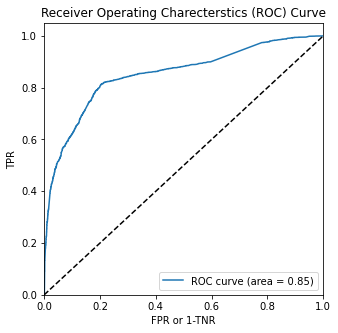

In [38]:
draw_ROC(y_train_pred_final['Converted'],y_train_pred_final['Converted_prob'])

ROC curve looks as expected... lets see metrics at each cutoffs.

 <h4 style = "color : blue"> Finding the Optimal Threshold </h4>

In [39]:
# lets create columns with diffrent probability cutoffs
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    y_train_pred_final[i] = y_train_pred_final['Converted_prob'].map(lambda x: 0 if x<i else 1)
    
y_train_pred_final.head()

,ID,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1871,0,0.133934,0,1,1,0,0,0,0,0,0,0,0
1,6795,0,0.210620,0,1,1,1,0,0,0,0,0,0,0
2,3516,0,0.157173,0,1,1,0,0,0,0,0,0,0,0
3,8105,0,0.575816,1,1,1,1,1,1,1,0,0,0,0
4,3934,0,0.133934,0,1,1,0,0,0,0,0,0,0,0


In [40]:
# now lets calculate accuracy, sensitivity and specificity for different probability cutoffs
cutoff_df = pd.DataFrame(columns = ['prob', 'accuracy', 'sensitivity', 'specificity'])

for i in num:
    cml = metrics.confusion_matrix(y_true = y_train_pred_final['Converted'], y_pred = y_train_pred_final[i])
    total1 = cml[0,0]+cml[0,1]+cml[1,0]+cml[1,1]
    acc = (cml[0,0]+cml[1,1])/total1
    sensi = cml[1,1]/ (cml[1,1]+cml[1,0])
    speci = cml[0,0]/ (cml[0,0]+cml[0,1])
    cutoff_df.loc[i] = [i,acc,sensi,speci]

print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.381262     1.000000     0.000000
0.1   0.1  0.451453     0.991890     0.118441
0.2   0.2  0.744743     0.848337     0.680910
0.3   0.3  0.802412     0.811030     0.797101
0.4   0.4  0.802876     0.760746     0.828836
0.5   0.5  0.795918     0.656123     0.882059
0.6   0.6  0.793599     0.567721     0.932784
0.7   0.7  0.778912     0.482157     0.961769
0.8   0.8  0.759740     0.406732     0.977261
0.9   0.9  0.713667     0.264396     0.990505


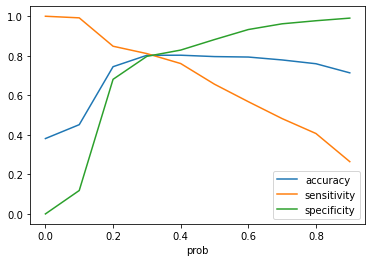

In [41]:
# lets plot accuracy, sensitivity and specificity for all cutoffs
cutoff_df.plot(x = 'prob', y = ['accuracy', 'sensitivity', 'specificity'])
plt.show()

As you can see, at about a threshold of 0.3, the curves of accuracy, sensitivity and specificity intersect, and they all take a value of around 80%.

In [42]:
y_train_pred_final['Predicted']= y_train_pred_final['Converted_prob'].map(lambda x: 0 if x<0.3 else 1)

# Create confusion matrix
confusion = metrics.confusion_matrix(y_true = y_train_pred_final['Converted'], y_pred = y_train_pred_final['Predicted'])
print('++++++++++++++ Confusion Matrix ++++++++++++++++++++++++++++++++++++++++++')   
print(confusion)
print()
print('++++++++++++++ Accuracy Score, Precission & Recall +++++++++++++++++++++++')
print('Accuracy Score:  ',round(metrics.accuracy_score(y_true = y_train_pred_final['Converted'], y_pred = y_train_pred_final['Predicted']),4))
print('Precission:      ', round(metrics.precision_score(y_true = y_train_pred_final['Converted'], y_pred = y_train_pred_final['Predicted']),4))
print('Recall:          ', round(metrics.recall_score(y_true = y_train_pred_final['Converted'], y_pred = y_train_pred_final['Predicted']),4))

++++++++++++++ Confusion Matrix ++++++++++++++++++++++++++++++++++++++++++
[[3190  812]
 [ 466 2000]]

++++++++++++++ Accuracy Score, Precission & Recall +++++++++++++++++++++++
Accuracy Score:   0.8024
Precission:       0.7112
Recall:           0.811


 <h4 style = "color : blue"> Making predictions. </h4>

In [43]:
# trasnform X_test
X_test[numvars] = scaler.transform(X_test[numvars])
X_test_sm = sm.add_constant(X_test[col])

#predit
y_pred = res.predict(X_test_sm)

y_pred = y_pred.values.reshape(-1)
y_pred_final=pd.DataFrame()
y_pred_final['ID']= y_test.index
y_pred_final['Converted']= y_test.values
y_pred_final['Converted_prob']= y_pred
y_pred_final['Predicted']= y_pred_final['Converted_prob'].map(lambda x: 0 if x<0.3 else 1)

# Create confusion matrix
confusion = metrics.confusion_matrix(y_true = y_pred_final['Converted'], y_pred = y_pred_final['Predicted'])
print('++++++++++++++ Confusion Matrix ++++++++++++++++++++++++++++++++++++++++++')   
print(confusion)
print('+++++++++++++++++++++++++++++++++')

# Calculate accuracy
print('Accuracy            :', round(metrics.accuracy_score(y_true = y_pred_final['Converted'], y_pred = y_pred_final['Predicted']),4))
print('Specificity         :', round(confusion[0,0]/ (confusion[0,0]+confusion[0,1]),4))
print('Precision           :', round(metrics.precision_score(y_true = y_pred_final['Converted'], y_pred = y_pred_final['Predicted']),4))
print('Recall              :', round(metrics.recall_score(y_true = y_pred_final['Converted'], y_pred = y_pred_final['Predicted']),4))

++++++++++++++ Confusion Matrix ++++++++++++++++++++++++++++++++++++++++++
[[1344  333]
 [ 218  877]]
+++++++++++++++++++++++++++++++++
Accuracy            : 0.8012
Specificity         : 0.8014
Precision           : 0.7248
Recall              : 0.8009
